In [1]:
########################################
# importing packages
########################################
import pandas            as pd                          # data science essentials
import matplotlib.pyplot as plt                         # fundamental data visualization
import seaborn           as sns                         # enhanced visualizations
from sklearn.preprocessing import StandardScaler        # standard scaler
from sklearn.decomposition import PCA                   # pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans              # k-means clustering

In [2]:
########################################
# loading data and setting display options
########################################
# loading data
my_df = pd.read_excel('Survey_Data_Final_Exam.xlsx')


# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

In [3]:
# Changing the names of columns

#Change the column names 
my_df.columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 
              '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', 
              '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', 
              '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', 
              '41', '42', '43', '44', '45', '46', '47', '48', '49', '50',
              'DNA_1', 'DNA_2', 'DNA_3', 'DNA_4', 'DNA_5', 'DNA_6', 'DNA_7',
              'DNA_8', 'DNA_9', 'DNA_10', 'DNA_11', 'DNA_12', 'DNA_13', 
              'DNA_14', 'DNA_15', 'DNA_16', 'DNA_17', 'DNA_18', 'DNA_19', 
              'DNA_20', 'DNA_21',
              'Current laptop',
              'Next laptop',
              'Program',
              'Age',
              'Gender',
              'Nationality', 
              'Ethnicity']

In [4]:
# Changing demographic data

placeholder_lst = []

for age in my_df['Age']:
    
    if age <= 20:
        age_range = '<20'
    
    elif age > 20 and age <= 25:
        age_range = '20-25'
    
    elif age > 25 and age <= 30:
        age_range = '26-30'
        
    elif age > 30 and age <= 35:
        age_range = '31-35'
    
    elif age > 36 and age <= 40:
        age_range = '36-40'
        
    elif age > 40:
        age_range = '>40'
        
    placeholder_lst.append(age_range)
    
my_df['age_range'] = placeholder_lst

In [5]:
# create a placeholder list
placeholder_lst = []

# create a list for nationality change
nation_change = [[['china'],'chinese'],
                 [['peru'], 'peruvian'],
                 [['mexico'], 'mexican'],
                 [['usa'], 'american'],
                 [['russia'], 'russian'],
                 [['ecuador'], 'ecuadorian'],
                 [['brazil'], 'brazilian'],
                 [['nigeria'], 'nigerian'],
                 [['korea','republicofkorea','southkorea'],'korean'],
                 [['spain'],'spanish'],
                 [['indonesia'],'indonesian'],
                 [['germany'],'german'],
                 [['colombia'], 'colombian'],
                 [['taiwan', 'taiwan(roc)'], 'taiwanese'],
                 [['japan'], 'japanese'],
                 [['canada'], 'canadian'],
                 [['philippines'], 'filipino'],
                 [['thailand'], 'thai'],
                 [['india'], 'indian'],
                 [['czechrepublic'], 'czech'],
                 [['belgium'], 'belgian'],
                 [['english'], 'british'],
                 [['ghana'], 'ghanaian'],
                 [['.', 'hispanic'], 'prefernottoanswer'],
                 [['italianandspanish', 'german/american', 'french/brazilian', 'british,indian', 'caribbean-american'], 'multi-ethnic'],
                 [['costarica'], 'costarrican'],
                 [['congolese(drcongo)'], 'congolese'],
                 [['venezuela'],'venezuelan'],
                 [['dominicanrepublic'],'dominican']
                
                ]

# create a for loop
for nationality in my_df['Nationality']:
    
    # remove " " and "."
    nationality = nationality.lower().replace(" ","").replace(".","")
    
    # create a loop
    for old_nat, new_nat in nation_change:
    
        # create if statement to check if nationality is wrong
        if nationality in old_nat:
            nationality = new_nat
    
    # append the correct nationality to a list
    placeholder_lst.append(nationality)

# create a new column
my_df['Nationality2'] = placeholder_lst

In [6]:
# create a placeholder list
placeholder_lst = []

# create a for loop
for nationality in my_df['Nationality2']:
    
    # check if nationality is in Asia
    if nationality in ['indian','chinese','taiwanese','filipino','korean',
                       'thai','indonesian','vietnamese','japanese','palestinian',
                       'kyrgyz','pakistani','bangladeshi','iran','malaysia']:
        nationality = 'Asian'
    
    # check if nationality is in Europe
    elif nationality in ['german','russian','italian','spanish','norwegian',
                         'turkish','belgian','czech','british','swiss',
                         'ukrainian','portuguese','belarus','dutch','poland',
                         'armenia','dutch']:
        nationality = 'European'
    
    # check if nationality is in North America
    elif nationality in ['mexican','american','canadian','dominican','costarrican',
                         'panama','guatemalan','elsalvador','honduran']:
        nationality = 'North American'
    
    # check if nationality is in South America
    elif nationality in ['peruvian','colombian','brazilian','ecuadorian',
                         'venezuelan']:
        nationality = 'South American'
    
    # check if nationality is in Africa
    elif nationality in ['nigerian','kenyan','congolese','ghanaian','ugandan',
                         'mauritius','southafrican','cameroon']:
        nationality = 'Africa'
    
    # check if nationality is multi-ethnic
    elif nationality == 'multi-ethnic':
        nationality = 'multi-ethnic'
    
    # put 'prefernottoanswer' for the remaining
    else: 
        nationality = 'prefernottoanswer'
    
    # append the new nationality group to a list
    placeholder_lst.append(nationality)

# create a new column
my_df['Nationality_continent'] = placeholder_lst

In [7]:
########################################
# Standardize the columns for negative question 
########################################
# DNA_2 to DNA_2n

placeholder_lst = []

for value in my_df['DNA_2']:
    
    if value == 1:
        DNA_2n = 5
    
    elif value == 2:
        DNA_2n = 4
    
    elif value == 3:
        DNA_2n = 3
        
    elif value == 4:
        DNA_2n = 2
    
    elif value == 5:
        DNA_2n = 1
        
    placeholder_lst.append(DNA_2n)
    
my_df['DNA_2n'] = placeholder_lst

# DNA_12 to DNA_12_n

placeholder_lst = []

for value in my_df['DNA_12']:
    
    if value == 1:
        DNA_12n = 5
    
    elif value == 2:
        DNA_12n = 4
    
    elif value == 3:
        DNA_12n = 3
        
    elif value == 4:
        DNA_12n = 2
    
    elif value == 5:
        DNA_12n = 1
        
    placeholder_lst.append(DNA_12n)
    
my_df['DNA_12n'] = placeholder_lst

# DNA_16 to DNA_16n

placeholder_lst = []

for value in my_df['DNA_16']:
    
    if value == 1:
        DNA_16n = 5
    
    elif value == 2:
        DNA_16n = 4
    
    elif value == 3:
        DNA_16n = 3
        
    elif value == 4:
        DNA_16n = 2
    
    elif value == 5:
        DNA_16n = 1
        
    placeholder_lst.append(DNA_16n)
    
my_df['DNA_16n'] = placeholder_lst

In [8]:
# Drop the columns
my_df = my_df.drop('DNA_2', axis = 1)
my_df = my_df.drop('DNA_12', axis = 1)
my_df = my_df.drop('DNA_16', axis = 1)

In [9]:
########################################
# Group1
########################################

# Self_awareneww, ['DNA_3']

#placeholder_lst = []
#for value in my_df['DNA_3']:
#    if value >4 :
#        placeholder_lst.append(1) 
#    else:
#         placeholder_lst.append(0)
    
my_df['Self_awareness'] = my_df['DNA_3']

# saving new columns
new_columns = my_df.columns

########################################
# Group2
########################################
########################################
# Embrace_cahnge ['DNA_19']
   
my_df['Embrace_change'] = my_df['DNA_19']

# saving new columns
new_columns = my_df.columns

########################################
# Group3
########################################
########################################
# Dynamic_thinking ['DNA_5']=['DNA_8']
my_df['Dynamic_thinking'] = my_df[['DNA_5','DNA_8']].mean(axis=1)

# saving new columns
new_columns = my_df.columns

########################################
# Group4
########################################
########################################
# Skillful_speaking ['DNA_11']   
my_df['Skillful_speaking'] = my_df['DNA_11']

# saving new columns
new_columns = my_df.columns

########################################
# Group5
########################################
########################################
# Influence ['DNA_6']=['DNA_9']
my_df['Influence'] = my_df[['DNA_6','DNA_9']].mean(axis=1)

# saving new columns
new_columns = my_df.columns

########################################
# Group6
########################################
########################################
# Present_ideas ['DNA_2n'], ['DNA_12n'], ['DNA_17']
my_df['Present_ideas'] = my_df[['DNA_2n','DNA_12n', 'DNA_17']].mean(axis=1)

# saving new columns
new_columns = my_df.columns

########################################
# Group7
########################################
########################################
# Collaborative ['DNA_13'], ['DNA_14'], ['DNA_16n']
my_df['Collaborative'] = my_df[['DNA_13','DNA_14', 'DNA_16n']].mean(axis=1)

# saving new columns
new_columns = my_df.columns

########################################
# Group8
########################################
########################################
# Inspire_productivity ['DNA_19'], ['DNA_20'], ['DNA_21'],['DNA_7']=['DNA_10']
my_df['Inspire_productivity'] = my_df[['DNA_19','DNA_20', 'DNA_21','DNA_7','DNA_10']].mean(axis=1)

# saving new columns
new_columns = my_df.columns

########################################
# Group9
########################################
########################################
# Resolve_conflict ['DNA_1'], ['DNA_5'], ['DNA_18']
my_df['Resolve_conflict'] = my_df[['DNA_1','DNA_5', 'DNA_18']].mean(axis=1)

# saving new columns
new_columns = my_df.columns

In [10]:
# # drop the columns

# my_df = my_df.drop('Current laptop', axis = 1)
# my_df = my_df.drop('Next laptop', axis = 1)
# my_df = my_df.drop('Program', axis = 1)
# my_df = my_df.drop('Age', axis = 1)
# my_df = my_df.drop('Gender', axis = 1)
# my_df = my_df.drop('Nationality', axis = 1)
# my_df = my_df.drop('Ethnicity', axis = 1)




In [11]:
my_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,DNA_1,DNA_3,DNA_4,DNA_5,DNA_6,DNA_7,DNA_8,DNA_9,DNA_10,DNA_11,DNA_13,DNA_14,DNA_15,DNA_17,DNA_18,DNA_19,DNA_20,DNA_21,Current laptop,Next laptop,Program,Age,Gender,Nationality,Ethnicity,age_range,Nationality2,Nationality_continent,DNA_2n,DNA_12n,DNA_16n,Self_awareness,Embrace_change,Dynamic_thinking,Skillful_speaking,Influence,Present_ideas,Collaborative,Inspire_productivity,Resolve_conflict
0,a1000,4,3,4,3,4,2,3,2,3,2,2,1,5,4,4,4,4,2,2,3,4,3,4,2,3,2,4,2,2,3,3,2,5,4,4,3,3,2,3,3,3,3,4,2,4,3,3,4,2,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,Macbook,Macbook,DD (MIB & Business Analytics),25,Female,ecuador,Hispanic / Latino,20-25,ecuadorian,South American,4,3,4,4,4,4.0,4,4.0,3.666667,4.000000,4.0,4.000000
1,a1001,2,4,3,4,3,3,2,3,4,2,3,1,4,4,5,3,4,2,4,2,3,5,3,4,4,3,4,2,1,1,2,2,5,4,4,4,4,3,2,2,2,3,5,4,5,4,5,5,3,4,4,2,4,4,4,5,5,5,5,5,4,4,2,4,5,5,4,5,Windows laptop,Windows laptop,One year Business Analytics,27,Male,Ecuador,Hispanic / Latino,26-30,ecuadorian,South American,4,4,3,2,5,4.5,5,4.5,4.000000,3.666667,4.8,4.333333
2,a1002,4,4,5,1,4,3,2,2,5,1,3,3,5,1,2,3,2,1,5,4,3,4,4,3,3,2,3,2,2,2,4,3,1,2,5,4,3,2,1,2,5,3,4,4,2,3,3,3,1,4,3,5,3,5,2,3,5,2,3,3,3,4,4,4,2,3,3,5,Windows laptop,Windows laptop,One year Business Analytics,25,Male,Indian,West Asian / Indian,20-25,indian,Asian,4,4,4,5,3,5.0,3,2.0,4.000000,3.666667,3.4,3.333333
3,a1003,4,5,3,3,3,3,5,3,5,4,3,1,4,4,5,5,5,3,3,3,4,2,3,1,5,4,5,2,2,1,3,3,3,4,3,3,4,3,4,3,2,5,3,5,5,3,5,3,3,5,3,3,5,5,5,4,4,4,4,5,5,5,5,3,5,5,5,5,Windows laptop,Windows laptop,One year Business Analytics,26,Female,indian,West Asian / Indian,26-30,indian,Asian,3,3,1,3,5,4.5,5,4.5,3.000000,3.666667,4.6,4.333333
4,a1004,5,4,4,4,3,3,3,3,3,3,3,3,3,4,5,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,3,3,4,4,4,4,4,3,3,3,3,4,4,3,3,5,3,3,3,3,3,3,4,4,3,3,4,3,3,3,3,3,Macbook,Windows laptop,DD (MBA & Disruptive innovation),27,Male,China,Far east Asian,26-30,chinese,Asian,3,2,2,5,3,3.0,4,3.0,2.666667,2.666667,3.2,3.000000


In [12]:
# dropping demographic information
my_df_DNA = my_df.loc[:, ['Self_awareness','Embrace_change','Dynamic_thinking',
                          'Skillful_speaking','Influence','Present_ideas',
                          'Collaborative','Inspire_productivity','Resolve_conflict']]

# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(my_df_DNA)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(my_df_DNA)


# converting scaled data into a DataFrame
DNA_scaled = pd.DataFrame(X_scaled)


# reattaching column names
DNA_scaled.columns = my_df_DNA.columns


# checking pre- and post-scaling variance
print(pd.np.var(my_df_DNA), '\n\n')
print(pd.np.var(DNA_scaled))
                             

Self_awareness          0.604585
Embrace_change          0.641966
Dynamic_thinking        0.506215
Skillful_speaking       0.659250
Influence               0.722251
Present_ideas           0.412698
Collaborative           0.347187
Inspire_productivity    0.308016
Resolve_conflict        0.322571
dtype: float64 


Self_awareness          1.0
Embrace_change          1.0
Dynamic_thinking        1.0
Skillful_speaking       1.0
Influence               1.0
Present_ideas           1.0
Collaborative           1.0
Inspire_productivity    1.0
Resolve_conflict        1.0
dtype: float64


/Users/Piya/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Piya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


In [13]:
########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()

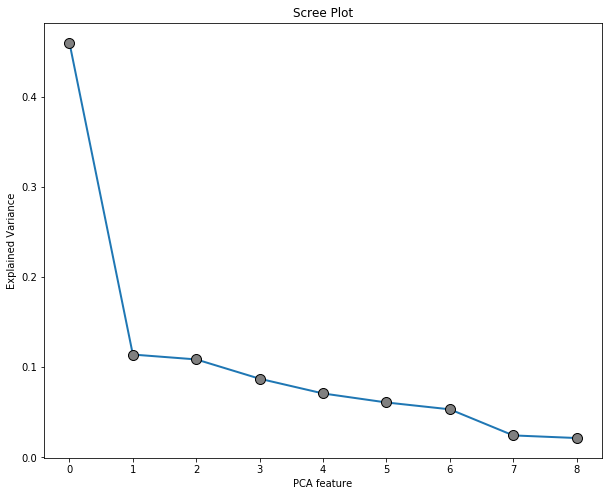

In [14]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
          random_state = 802)


# FITTING and TRANSFORMING the purchases_scaled
customer_pca = pca.fit_transform(DNA_scaled)


# calling the scree_plot function
scree_plot(pca_object = pca)

In [17]:
# INSTANTIATING a new model using the first three principal components
pca_3 = PCA(n_components = 2,
            random_state = 802)


# FITTING and TRANSFORMING the purchases_scaled
customer_pca_3 = pca_3.fit_transform(DNA_scaled)

In [19]:
####################
### Max PC Model ###
####################
# transposing pca components (pc = MAX)
factor_loadings = pd.DataFrame(pd.np.transpose(pca.components_))


# naming rows as original features
factor_loadings = factor_loadings.set_index(DNA_scaled.columns)


##################
### 3 PC Model ###
##################
# transposing pca components (pc = 3)
factor_loadings_3 = pd.DataFrame(pd.np.transpose(pca_3.components_))


# naming rows as original features
factor_loadings_3 = factor_loadings_3.set_index(DNA_scaled.columns)


# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{factor_loadings.round(2)}


2 Components Factor Loadings
------------------------------
{factor_loadings_3.round(2)}
""")


MAX Components Factor Loadings
------------------------------
                         0     1     2     3     4     5     6     7     8
Self_awareness       -0.30  0.15 -0.14  0.60 -0.65 -0.21 -0.23  0.02  0.00
Embrace_change       -0.30  0.02 -0.58 -0.54 -0.22 -0.00  0.01  0.42  0.25
Dynamic_thinking     -0.39  0.22  0.03  0.22  0.23 -0.01  0.61  0.39 -0.42
Skillful_speaking    -0.21 -0.75 -0.19  0.16  0.31 -0.45 -0.15  0.06 -0.11
Influence            -0.34  0.34  0.15  0.08  0.48  0.12 -0.65  0.24  0.10
Present_ideas        -0.23 -0.06  0.71 -0.41 -0.29 -0.39 -0.04  0.16 -0.03
Collaborative        -0.30 -0.49  0.24  0.10 -0.18  0.74  0.03  0.11  0.12
Inspire_productivity -0.42  0.06 -0.16 -0.30 -0.05  0.12 -0.14 -0.60 -0.54
Resolve_conflict     -0.43  0.09  0.05  0.07  0.19 -0.14  0.33 -0.45  0.66


2 Components Factor Loadings
------------------------------
                         0     1
Self_awareness       -0.30  0.15
Embrace_change       -0.30  0.02
Dynamic_thinking     -0.39

In [20]:
# Defining Components
# 0	Cold_Realist OR MIXED
# 1	Calm_Outsider
# 2	Calm_Insider
# 3	Polite_Realist
# 4	Polite_Dreamer


# naming each principal component
factor_loadings_3.columns = ['All_rounded',
                             'Influencer_weak_speaking']


# checking the result
factor_loadings_3

,All_rounded,Influencer_weak_speaking
Self_awareness,-0.296799,0.149706
Embrace_change,-0.297888,0.022974
Dynamic_thinking,-0.391293,0.224158
Skillful_speaking,-0.212404,-0.747916
Influence,-0.340732,0.340719
Present_ideas,-0.232097,-0.063427
Collaborative,-0.298197,-0.485616
Inspire_productivity,-0.423612,0.056503
Resolve_conflict,-0.431985,0.091147


In [22]:
# analyzing factor strengths per customer
X_pca_reduced = pca_3.transform(DNA_scaled)


# converting to a DataFrame
X_pca_df = pd.DataFrame(X_pca_reduced)


# checking the results
X_pca_df

,0,1
0,-0.103689,0.052872
1,-1.264994,-0.489936
2,1.413184,0.724841
3,-1.132760,-0.219030
4,3.244572,0.456447
5,1.275560,-0.265581
6,-0.532058,0.163621
7,-2.371018,0.743918
8,-0.392813,-0.254759
9,0.538100,-0.282222


In [23]:
pd.np.var(X_pca_df)

0    4.140738
1    1.025677
dtype: float64

In [24]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(X_pca_df)


# TRANSFORMING our data after fit
X_scaled_pca = scaler.transform(X_pca_df)


# converting scaled data into a DataFrame
pca_scaled = pd.DataFrame(X_scaled_pca)


# reattaching column names
pca_scaled.columns = ['All_rounded',
                             'Influencer_weak_speaking']


# checking pre- and post-scaling variance
print(pd.np.var(X_pca_df), '\n\n')
print(pd.np.var(pca_scaled))

0    4.140738
1    1.025677
dtype: float64 


All_rounded                 1.0
Influencer_weak_speaking    1.0
dtype: float64


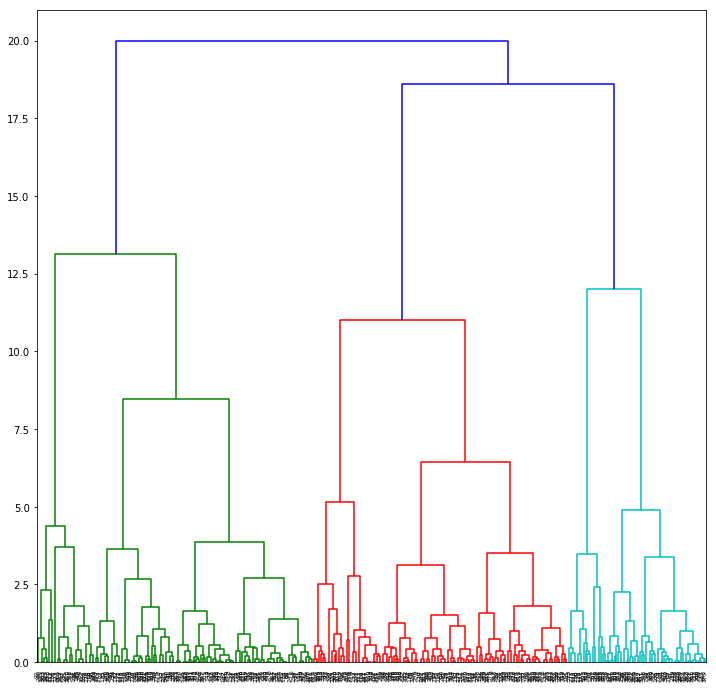

In [25]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_scaled,
                                 method = 'ward')


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# saving and displaying the plot
plt.savefig('standard_hierarchical_clust_ward.png')
plt.show()

In [26]:
########################################
# inertia
########################################
def interia_plot(data, max_clust = 50):
    """
PARAMETERS
----------
data      : DataFrame, data from which to build clusters. Dataset should be scaled
max_clust : int, maximum of range for how many clusters to check interia, default 50
    """

    ks = range(1, max_clust)
    inertias = []


    for k in ks:
        # INSTANTIATING a kmeans object
        model = KMeans(n_clusters = k)


        # FITTING to the data
        model.fit(data)


        # append each inertia to the list of inertias
        inertias.append(model.inertia_)



    # plotting ks vs inertias
    fig, ax = plt.subplots(figsize = (12, 8))
    plt.plot(ks, inertias, '-o')


    # labeling and displaying the plot
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()


########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()

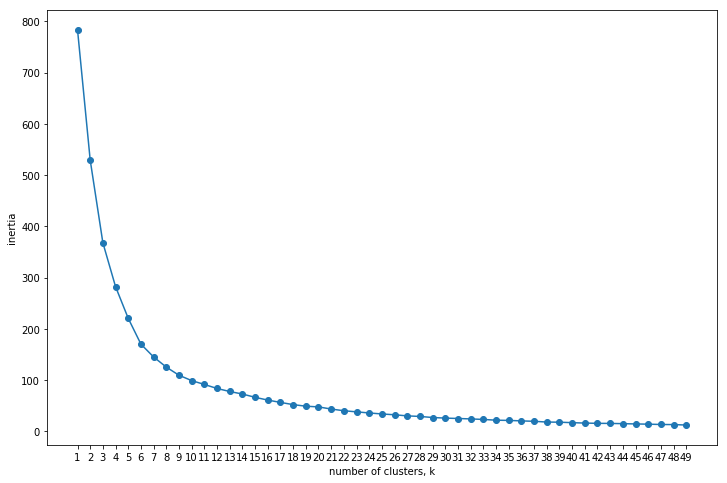

In [27]:
# calling the inertia_plot() function
interia_plot(data = pca_scaled)

In [33]:
# INSTANTIATING a k-Means object with three clusters
customers_k_pca = KMeans(n_clusters = 3,
                         random_state = 802)


# fitting the object to the data
customers_k_pca.fit(pca_scaled)


# converting the clusters to a DataFrame
customers_kmeans_pca = pd.DataFrame({'Cluster': customers_k_pca.labels_})


# checking the results
print(customers_kmeans_pca.iloc[: , 0].value_counts())

0    155
1    137
2    100
Name: Cluster, dtype: int64


In [34]:
# 0	Cold_Realist OR MIXED
# 1	Calm_Outsider
# 2	Calm_Insider

# storing cluster centers
centroids_pca = customers_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components
centroids_pca_df.columns = ['All_rounded',
                             'Influencer_weak_speaking']


# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,All_rounded,Influencer_weak_speaking
0,-0.87,0.22
1,0.80,0.63
2,0.25,-1.20


In [35]:
# Changing Mac to Macbook
my_df['Current laptop'] =  my_df['Current laptop'].replace('MAC', 'Macbook')
my_df['Next laptop'] =  my_df['Next laptop'].replace('MAC', 'Macbook')

In [36]:
# concatenating cluster memberships with principal components
clst_pca_df = pd.concat([customers_kmeans_pca,
                         X_pca_df],
                         axis = 1)


# checking results
clst_pca_df


# concatenating demographic information with pca-clusters
final_pca_clust_df = pd.concat([my_df.loc[ : , ['Current laptop', 'Next laptop', 'Program', 'Gender', 'age_range',
                                                'Nationality_continent', 'Ethnicity']],
                                clst_pca_df],
                                axis = 1)


# renaming columns
final_pca_clust_df.columns = ['Current laptop',
                              'Next laptop',
                              'Program',
                              'Gender',
                              'age_range',
                              'Nationality_continent',
                              'Ethnicity',
                              'Cluster',
                              'All_rounded',
                             'Influencer_weak_speaking']




In [37]:
# renaming clusters
cluster_names = {0 : 'Cluster 1',
                 1 : 'Cluster 2',
                 2 : 'Cluster 3'
                }


final_pca_clust_df['Cluster'].replace(cluster_names, inplace = True)


# adding a productivity step
data_df = final_pca_clust_df


In [38]:
data_df[data_df['Current laptop']=='Macbook'][data_df['Cluster'] == 'Cluster 1']

/Users/Piya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Current laptop,Next laptop,Program,Gender,age_range,Nationality_continent,Ethnicity,Cluster,All_rounded,Influencer_weak_speaking
0,Macbook,Macbook,DD (MIB & Business Analytics),Female,20-25,South American,Hispanic / Latino,Cluster 1,-0.103689,0.052872
7,Macbook,Macbook,DD (MIB & Business Analytics),Male,20-25,European,White / Caucasian,Cluster 1,-2.371018,0.743918
14,Macbook,Macbook,One year Business Analytics,Male,26-30,Asian,Far east Asian,Cluster 1,-1.356282,-0.298487
16,Macbook,Macbook,DD (MIB & Business Analytics),Female,20-25,Asian,West Asian / Indian,Cluster 1,-1.891936,0.004143
27,Macbook,Windows laptop,DD (MIB & Business Analytics),Female,20-25,European,White / Caucasian,Cluster 1,-3.810518,-0.185332
31,Macbook,Macbook,DD (MIB & Business Analytics),Male,26-30,European,Middle Eastern,Cluster 1,-0.376774,0.040323
36,Macbook,Macbook,DD (MIB & Business Analytics),Female,20-25,multi-ethnic,White / Caucasian,Cluster 1,-1.121486,1.222061
38,Macbook,Macbook,DD (MIB & Business Analytics),Male,26-30,Asian,Far east Asian,Cluster 1,-3.432504,-1.066686
40,Macbook,Macbook,DD (MBA & Business Analytics),Male,>40,North American,Hispanic / Latino,Cluster 1,-0.997748,-0.394261
41,Macbook,Macbook,DD (MIB & Business Analytics),Male,20-25,European,White / Caucasian,Cluster 1,-2.250994,0.309992


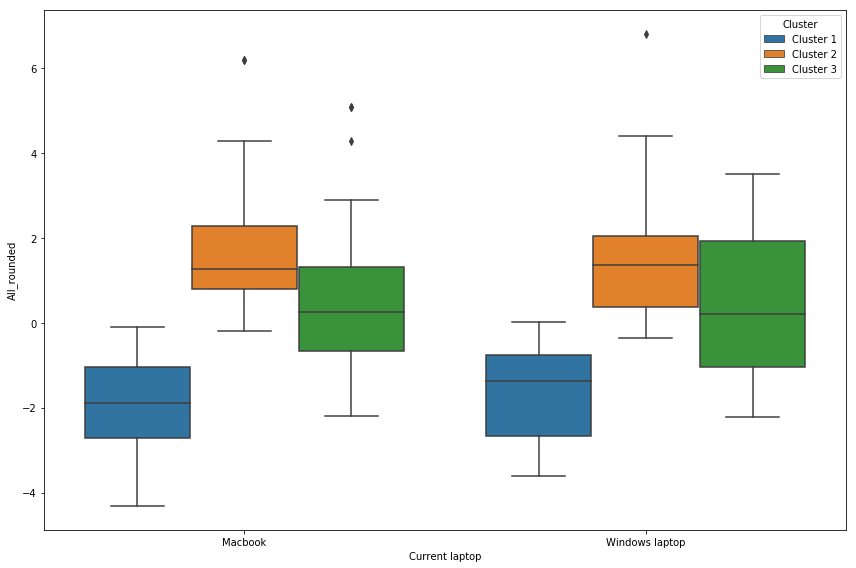

In [40]:
########################
# Current laptop
########################

# Balanced
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Current laptop',
            y = 'All_rounded',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

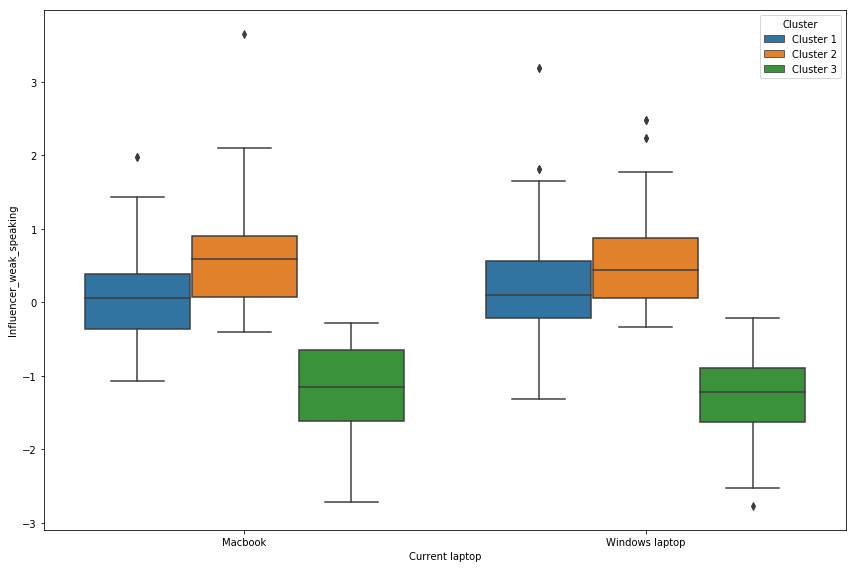

In [41]:
########################
# Current laptop
########################

# Balanced
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Current laptop',
            y = 'Influencer_weak_speaking',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

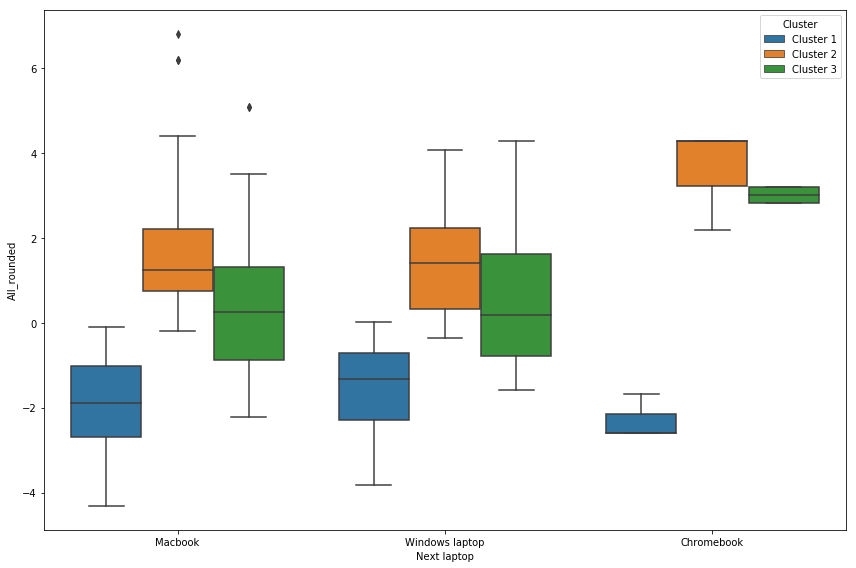

In [42]:
########################
# Next laptop
########################

# Balanced
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Next laptop',
            y = 'All_rounded',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

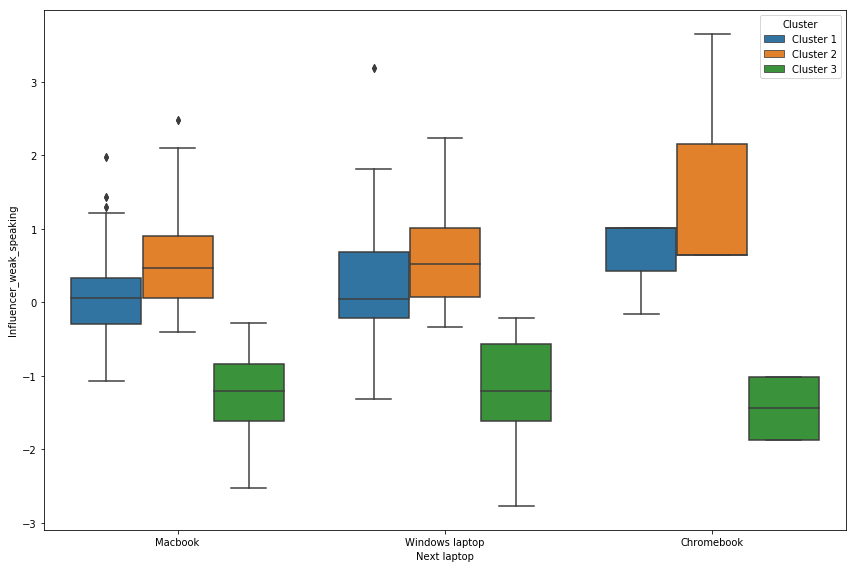

In [43]:
########################
# Next laptop
########################

# Balanced
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Next laptop',
            y = 'Influencer_weak_speaking',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

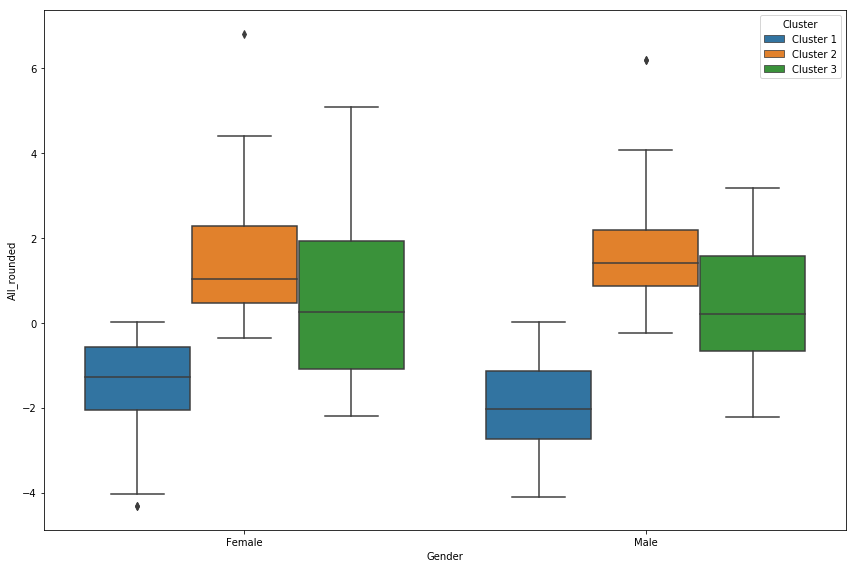

In [44]:
########################
# Gender
########################

# Balanced
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Gender',
            y = 'All_rounded',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

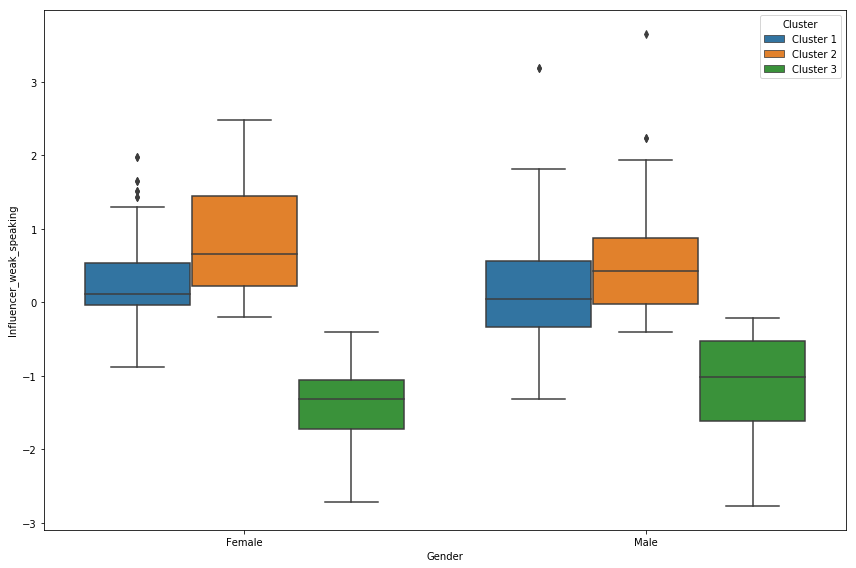

In [45]:
########################
# Gender
########################

# Balanced
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Gender',
            y = 'Influencer_weak_speaking',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

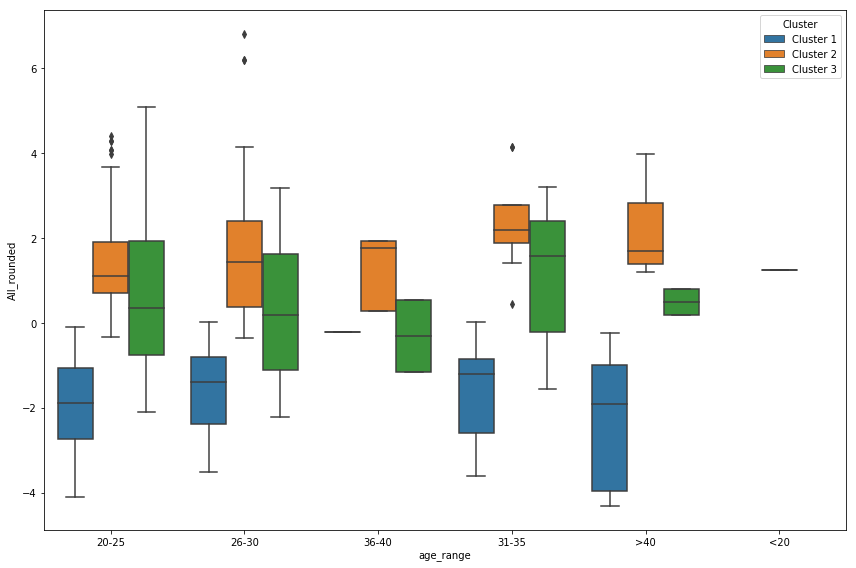

In [46]:
########################
# Age
########################

# Balanced
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'age_range',
            y = 'All_rounded',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

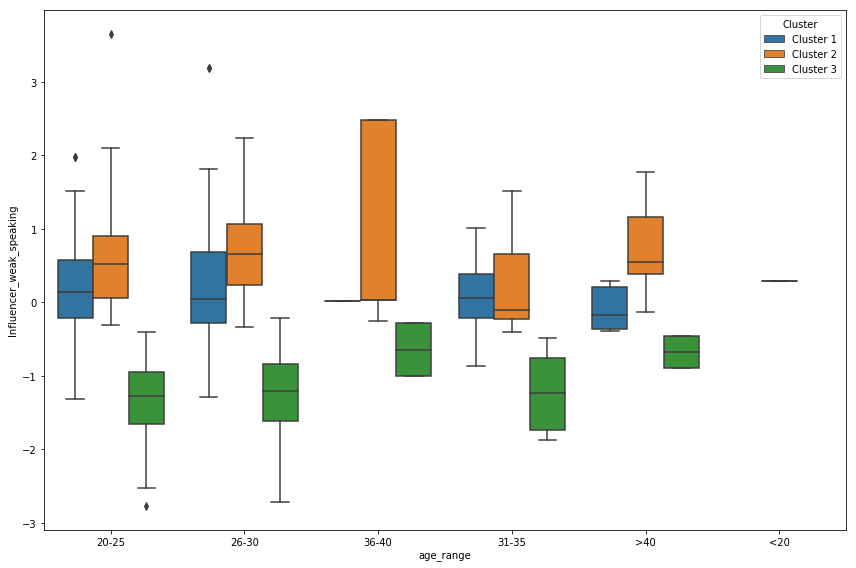

In [47]:
########################
# Age
########################

# Balanced
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'age_range',
            y = 'Influencer_weak_speaking',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

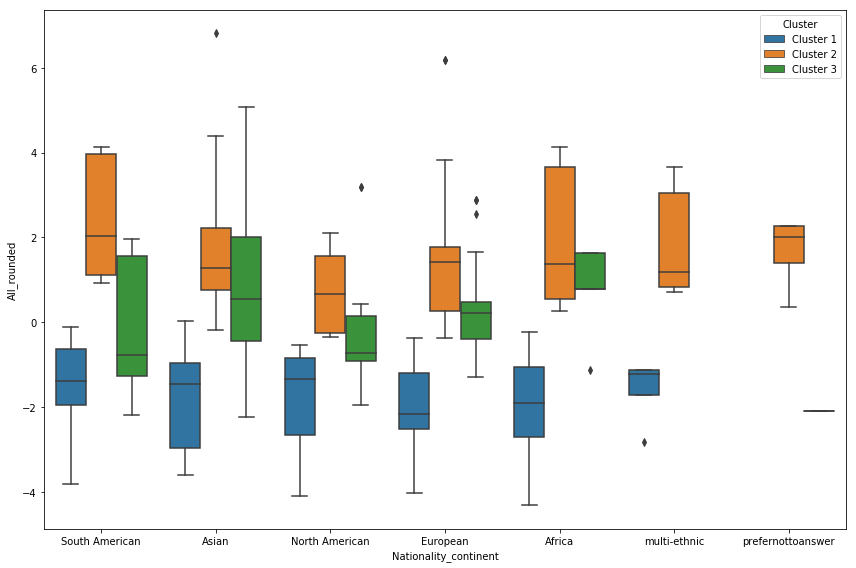

In [48]:
########################
# Nationality
########################

# Balanced
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Nationality_continent',
            y = 'All_rounded',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()

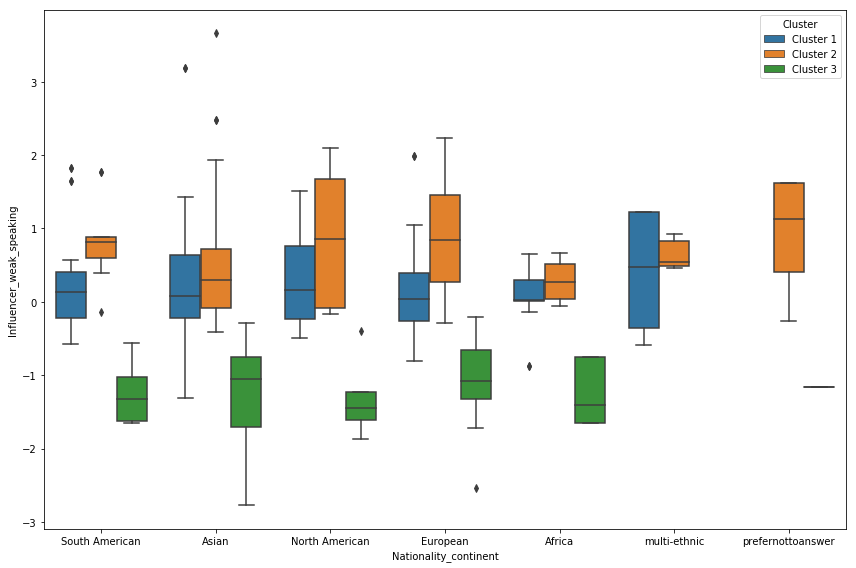

In [49]:
########################
# Nationality
########################

# Balanced
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Nationality_continent',
            y = 'Influencer_weak_speaking',
            hue = 'Cluster',
            data = data_df)


plt.tight_layout()
plt.show()